## Flight Price Prediction Model

### Business Context

In the realm of travel and tourism, the intersection of data analytics and machine learning presents an opportunity to revolutionize the way travel experiences are curated and delivered. This capstone project revolves around a trio of datasets - users, flights, and hotels - each providing a unique perspective on travel patterns and preferences. The goal is to leverage these datasets to build and deploy sophisticated machine learning models, serving a dual purpose: enhancing predictive capabilities in travel-related decision-making and mastering the art of MLOps through hands-on application.



### Github Link

https://github.com/ish-war/voyage_analysis-Integrating-MLOps-in-Travel

### Project Objective

* Build a regression model to predict the price of a flight using the flights.csv dataset. Focus on feature selection, model training, and validation to ensure accuracy and reliability.

* Develop a REST API using Flask to serve the flight price prediction model, enabling real-time price predictions.

* Package and deploy the flight price prediction model using Docker, ensuring portability and ease of deployment.

* Deploy the model using Kubernetes to manage scalability and handle varying loads efficiently.

* Design and implement automated workflows for managing the travel data, specifically for the regression models. Develop Directed Acyclic Graphs (DAGs) to orchestrate complex workflows in an efficient and manageable way.

* Utilize MLFlow for tracking and managing different versions of the travel price prediction model, ensuring a systematic approach to model iteration and deployment.

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")

### Loading Datasets

In [3]:
flight_df = pd.read_csv('C:/Users/Ishwar/voyage_analysis/data/flights.csv')
hotel_df = pd.read_csv('C:/Users/Ishwar/voyage_analysis/data/hotels.csv')
user_df = pd.read_csv('C:/Users/Ishwar/voyage_analysis/data/users.csv')

## Data Preprocessing

In [4]:
flight_df.head()

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019


In [5]:
flight_df.tail()

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
271883,135941,1339,Campo Grande (MS),Florianopolis (SC),firstClass,1446.34,1.49,573.81,CloudFy,07/12/2020
271884,135942,1339,Florianopolis (SC),Natal (RN),economic,726.95,1.84,709.37,CloudFy,07/16/2020
271885,135942,1339,Natal (RN),Florianopolis (SC),economic,873.07,1.84,709.37,CloudFy,07/20/2020
271886,135943,1339,Florianopolis (SC),Rio de Janeiro (RJ),economic,313.62,1.21,466.30,CloudFy,07/23/2020
271887,135943,1339,Rio de Janeiro (RJ),Florianopolis (SC),economic,533.69,1.21,466.30,CloudFy,07/26/2020


In [6]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271888 entries, 0 to 271887
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   travelCode  271888 non-null  int64  
 1   userCode    271888 non-null  int64  
 2   from        271888 non-null  object 
 3   to          271888 non-null  object 
 4   flightType  271888 non-null  object 
 5   price       271888 non-null  float64
 6   time        271888 non-null  float64
 7   distance    271888 non-null  float64
 8   agency      271888 non-null  object 
 9   date        271888 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 20.7+ MB


In [7]:
flight_df.shape

(271888, 10)

In [8]:
flight_df.columns

Index(['travelCode', 'userCode', 'from', 'to', 'flightType', 'price', 'time',
       'distance', 'agency', 'date'],
      dtype='object')

In [9]:
hotel_df.head()

,travelCode,userCode,name,place,days,price,total,date
0,0,0,Hotel A,Florianopolis (SC),4,313.02,1252.08,09/26/2019
1,2,0,Hotel K,Salvador (BH),2,263.41,526.82,10/10/2019
2,7,0,Hotel K,Salvador (BH),3,263.41,790.23,11/14/2019
3,11,0,Hotel K,Salvador (BH),4,263.41,1053.64,12/12/2019
4,13,0,Hotel A,Florianopolis (SC),1,313.02,313.02,12/26/2019


In [10]:
hotel_df.tail()

,travelCode,userCode,name,place,days,price,total,date
40547,135938,1339,Hotel BP,Brasilia (DF),3,247.62,742.86,06/18/2020
40548,135939,1339,Hotel BP,Brasilia (DF),1,247.62,247.62,06/25/2020
40549,135940,1339,Hotel BW,Campo Grande (MS),3,60.39,181.17,07/02/2020
40550,135941,1339,Hotel BW,Campo Grande (MS),3,60.39,181.17,07/09/2020
40551,135942,1339,Hotel BD,Natal (RN),4,242.88,971.52,07/16/2020


In [11]:
hotel_df.shape

(40552, 8)

In [12]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40552 entries, 0 to 40551
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   travelCode  40552 non-null  int64  
 1   userCode    40552 non-null  int64  
 2   name        40552 non-null  object 
 3   place       40552 non-null  object 
 4   days        40552 non-null  int64  
 5   price       40552 non-null  float64
 6   total       40552 non-null  float64
 7   date        40552 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 2.5+ MB


In [13]:
user_df.head()

,code,company,name,gender,age
0,0,4You,Roy Braun,male,21
1,1,4You,Joseph Holsten,male,37
2,2,4You,Wilma Mcinnis,female,48
3,3,4You,Paula Daniel,female,23
4,4,4You,Patricia Carson,female,44


In [14]:
user_df.tail()

,code,company,name,gender,age
1335,1335,Umbrella LTDA,Albert Garroutte,male,23
1336,1336,Umbrella LTDA,Kim Shores,female,40
1337,1337,Umbrella LTDA,James Gimenez,male,28
1338,1338,Umbrella LTDA,Viola Agosta,female,52
1339,1339,Umbrella LTDA,Paul Rodriguez,male,35


In [15]:
user_df.shape

(1340, 5)

In [16]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   code     1340 non-null   int64 
 1   company  1340 non-null   object
 2   name     1340 non-null   object
 3   gender   1340 non-null   object
 4   age      1340 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 52.5+ KB


In [17]:
print("Total no. of rows in flight_df are", flight_df.shape[0], "and Total no. of columns are", flight_df.shape[1],".")
print("Total no. of rows in hotel_df are", hotel_df.shape[0], "and Total no. of columns are", hotel_df.shape[1],".")
print("Total no. of rows in user_df are", user_df.shape[0], "and Total no. of columns are", user_df.shape[1],".")

Total no. of rows in flight_df are 271888 and Total no. of columns are 10 .
Total no. of rows in hotel_df are 40552 and Total no. of columns are 8 .
Total no. of rows in user_df are 1340 and Total no. of columns are 5 .


In [18]:
flight_df.describe(include='object')


,from,to,flightType,agency,date
count,271888,271888,271888,271888,271888
unique,9,9,3,3,999
top,Florianopolis (SC),Florianopolis (SC),firstClass,Rainbow,09/26/2019
freq,57317,57317,116418,116752,1335


In [19]:
df_list=[flight_df,hotel_df,user_df]
df_name_list=['flight_df','hotel_df','user_df']


### Summary Statistics

In [20]:
# Summary statistics of numeric columns

for i in df_name_list:
  if i == 'flight_df':
    print(i)
    print('-'*50)
    print(df_list[0].describe())
    print('-'*50)

  elif i == 'hotel_df':
    print(i)
    print('-'*50)

    print(df_list[1].describe())
    print('-'*50)
  else:
    print(i)
    print('-'*50)
    print(df_list[2].describe())

flight_df
--------------------------------------------------
          travelCode       userCode         price           time  \
count  271888.000000  271888.000000  271888.00000  271888.000000   
mean    67971.500000     667.505495     957.37503       1.421147   
std     39243.724665     389.523127     362.31189       0.542541   
min         0.000000       0.000000     301.51000       0.440000   
25%     33985.750000     326.000000     672.66000       1.040000   
50%     67971.500000     659.000000     904.00000       1.460000   
75%    101957.250000    1011.000000    1222.24000       1.760000   
max    135943.000000    1339.000000    1754.17000       2.440000   

            distance  
count  271888.000000  
mean      546.955535  
std       208.851288  
min       168.220000  
25%       401.660000  
50%       562.140000  
75%       676.530000  
max       937.770000  
--------------------------------------------------
hotel_df
--------------------------------------------------
        

### Null Values Check

In [21]:
# Check for Missing Values

for i in df_name_list:
  if i == 'flight_df':
    print('Total no. of null rows in flight_df :\n', df_list[0].isnull().sum())
    print('-'*50)

  elif i == 'hotel_df':
    print('Total no. of null rows in hotel_df :\n', df_list[1].isnull().sum())
    print('-'*50)

  else:
    print('Total no. of null rows in user_df :\n', df_list[2].isnull().sum())

Total no. of null rows in flight_df :
 travelCode    0
userCode      0
from          0
to            0
flightType    0
price         0
time          0
distance      0
agency        0
date          0
dtype: int64
--------------------------------------------------
Total no. of null rows in hotel_df :
 travelCode    0
userCode      0
name          0
place         0
days          0
price         0
total         0
date          0
dtype: int64
--------------------------------------------------
Total no. of null rows in user_df :
 code       0
company    0
name       0
gender     0
age        0
dtype: int64


In [22]:
# Check for Duplicate rows

for i in df_name_list:
  if i == 'flight_df':
    print(f'Total no. of duplicate rows in {i}: {df_list[0].duplicated().sum()}')
  elif i == 'hotel_df':
    print(f'Total no. of duplicate rows in {i}: {df_list[1].duplicated().sum()}')
  else:
    print(f'Total no. of duplicate rows in {i}: {df_list[2].duplicated().sum()}')


Total no. of duplicate rows in flight_df: 0
Total no. of duplicate rows in hotel_df: 0
Total no. of duplicate rows in user_df: 0


### Feature Engineering

In [23]:
# Converting date coulmn data type into datetime

flight_df['date'] = pd.to_datetime(flight_df['date'])

# Extracting WeekNo., Month, Year, Weekday from date column

flight_df['week_day'] = flight_df['date'].dt.weekday
flight_df['month'] = flight_df['date'].dt.month
flight_df['week_no'] = flight_df['date'].dt.isocalendar().week
flight_df['year'] = flight_df['date'].dt.year
flight_df['day'] = flight_df['date'].dt.day

In [24]:
flight_df.head()


,travelCode,userCode,from,to,flightType,price,time,distance,agency,date,week_day,month,week_no,year,day
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,2019-09-26,3,9,39,2019,26
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,2019-09-30,0,9,40,2019,30
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,2019-10-03,3,10,40,2019,3
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,2019-10-04,4,10,40,2019,4
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,2019-10-10,3,10,41,2019,10


In [25]:
flight_df.shape

(271888, 15)

In [26]:
flight_filtered_df= flight_df[['from','to','flightType','agency','time','distance','day','month','year','week_day','week_no','price']]
flight_filtered_df.head()

,from,to,flightType,agency,time,distance,day,month,year,week_day,week_no,price
0,Recife (PE),Florianopolis (SC),firstClass,FlyingDrops,1.76,676.53,26,9,2019,3,39,1434.38
1,Florianopolis (SC),Recife (PE),firstClass,FlyingDrops,1.76,676.53,30,9,2019,0,40,1292.29
2,Brasilia (DF),Florianopolis (SC),firstClass,CloudFy,1.66,637.56,3,10,2019,3,40,1487.52
3,Florianopolis (SC),Brasilia (DF),firstClass,CloudFy,1.66,637.56,4,10,2019,4,40,1127.36
4,Aracaju (SE),Salvador (BH),firstClass,CloudFy,2.16,830.86,10,10,2019,3,41,1684.05


In [27]:
flight_filtered_df.shape

(271888, 12)

## Exploratory Data Analysis

### Univariate Analysis

#### 1. Check for skewness in the distribution of numerical Columns

In [28]:
# Select only the numerical columns
numerical_columns = flight_filtered_df.select_dtypes(include=['number'])

# Calculate the skewness for the numerical columns
skewness = numerical_columns.skew()

print(skewness)

time       -0.179825
distance   -0.183944
day         0.006463
month      -0.039119
year        0.378661
week_day   -0.441701
week_no    -0.030191
price       0.313578
dtype: Float64


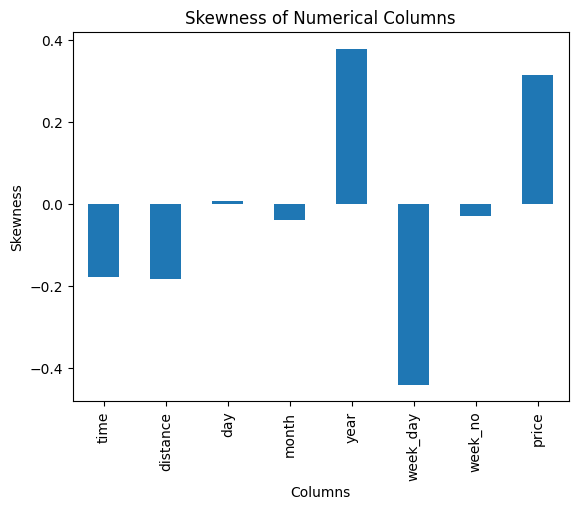

In [29]:
skewness.plot(kind='bar')
plt.title('Skewness of Numerical Columns')
plt.xlabel('Columns')
plt.ylabel('Skewness')
plt.show()

Observations =
* From the above result, we can check which variable is normally distributed and which is not.

* The variables with skewness > 1 price are highly positively skewed.

* The variables with skewness < -1 are highly negatively skewed.

* The variables with 0.5 < skewness < 1 are moderately positively skewed.

* The variables with -0.5 < skewness < -1 are moderately negatively skewed.

#### 2. Check the distribution of the travel time.

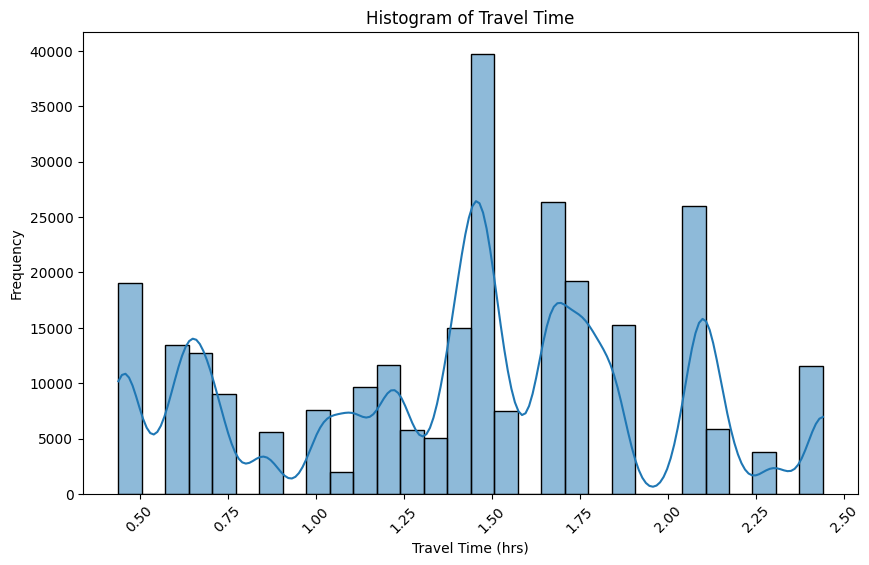

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(flight_filtered_df['time'], bins=30, kde=True)
plt.title('Histogram of Travel Time')
plt.xlabel('Travel Time (hrs)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

The histogram shows the distribution of travel time, with the x-axis representing the travel time and the y-axis representing the frequency (i.e., the number of occurrences) of these travel time.

#### 3. Check the flight price distribution.

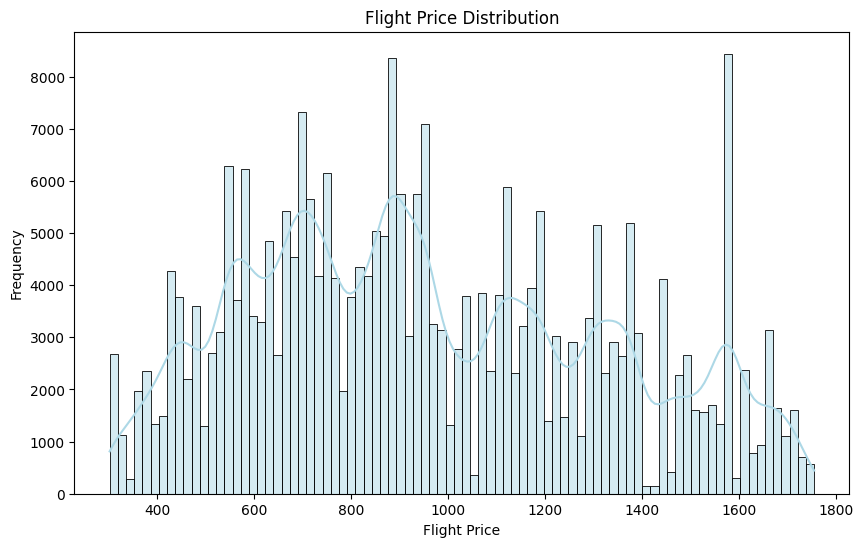

In [31]:
# Flight Price Distribution

plt.figure(figsize=(10, 6))
sns.histplot(flight_filtered_df['price'], kde=True, color='lightblue')
plt.title('Flight Price Distribution')
plt.xlabel('Flight Price')
plt.ylabel('Frequency')
plt.show()


Observation :
* The majority of the prices seem to be concentrated in a relatively narrow range, indicating a common price range for these travel packages.

* There is a long tail on the right side of the distribution, suggesting that there are a few travel packages with significantly higher prices compared to the majority.

* The distribution appears to be right-skewed, with prices tapering off as they increase.

* Overall, this plot provides insight into the distribution of prices, which is valuable information for understanding the pricing structure of the travel packages in the dataset.

### **Check for Outliers in Numerical Coulmns using Box-plot**

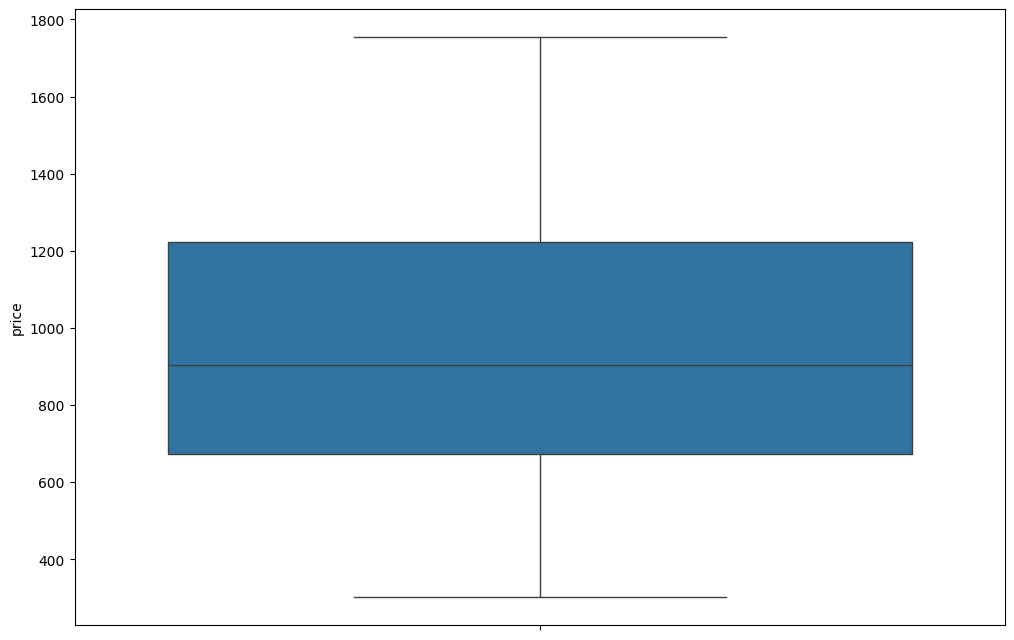

In [32]:
# Plot box plots for numeric columns to detect outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=flight_filtered_df['price'])
plt.xticks(rotation=45)
plt.show()

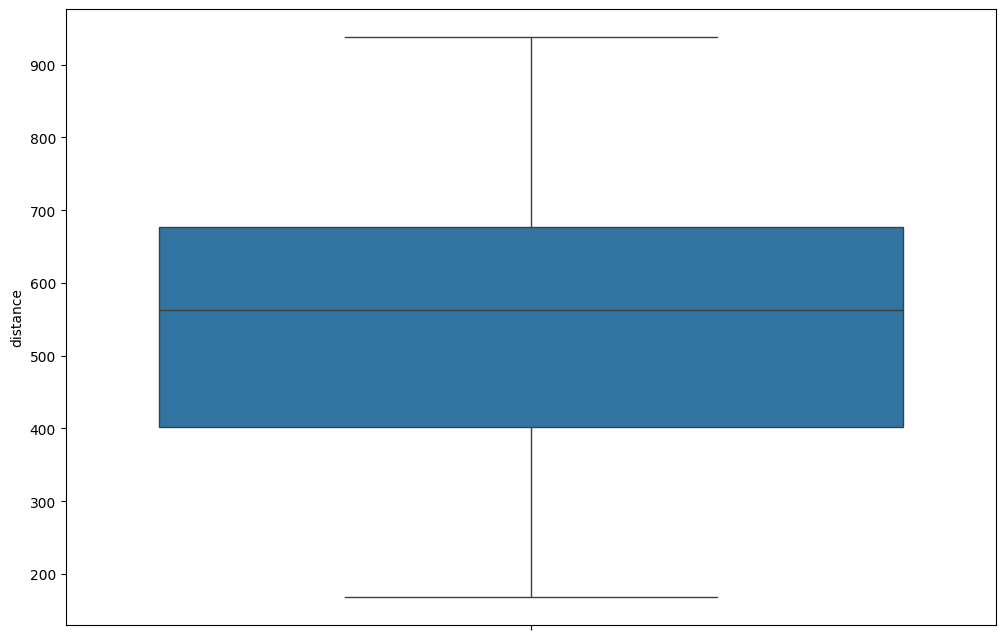

In [33]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=flight_filtered_df['distance'])
plt.xticks(rotation=45)
plt.show()

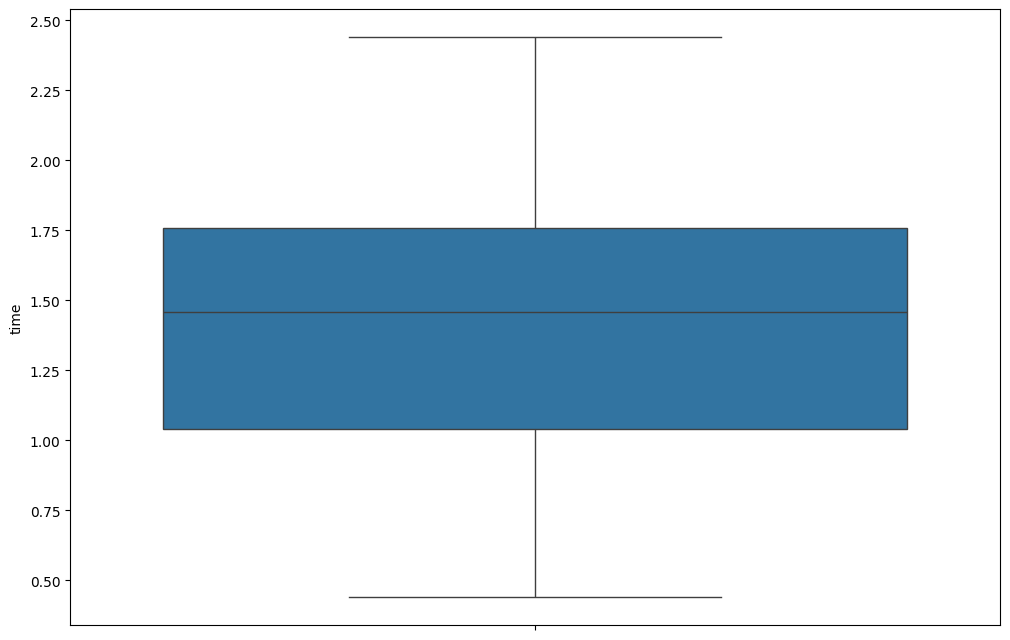

In [34]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=flight_filtered_df['time'])
plt.xticks(rotation=45)
plt.show()

### **Distribution of Categories in Categorical Coulmns using a Count-plot**

In [35]:
flight_filtered_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271888 entries, 0 to 271887
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   from        271888 non-null  object 
 1   to          271888 non-null  object 
 2   flightType  271888 non-null  object 
 3   agency      271888 non-null  object 
 4   time        271888 non-null  float64
 5   distance    271888 non-null  float64
 6   day         271888 non-null  int32  
 7   month       271888 non-null  int32  
 8   year        271888 non-null  int32  
 9   week_day    271888 non-null  int32  
 10  week_no     271888 non-null  UInt32 
 11  price       271888 non-null  float64
dtypes: UInt32(1), float64(3), int32(4), object(4)
memory usage: 20.0+ MB


#### Total count of different flight types

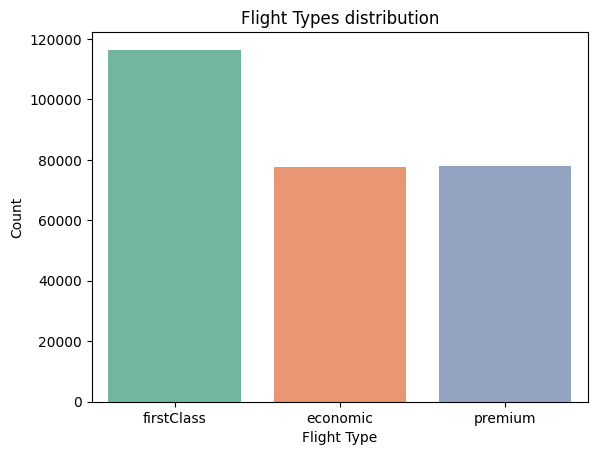

In [36]:
sns.countplot(x='flightType',data=flight_filtered_df,palette = "Set2")
plt.title('Flight Types distribution')
plt.xlabel('Flight Type')
plt.ylabel('Count')
plt.show()

First class is the most preferred flight type by the customers.

#### Distribution of different agencies

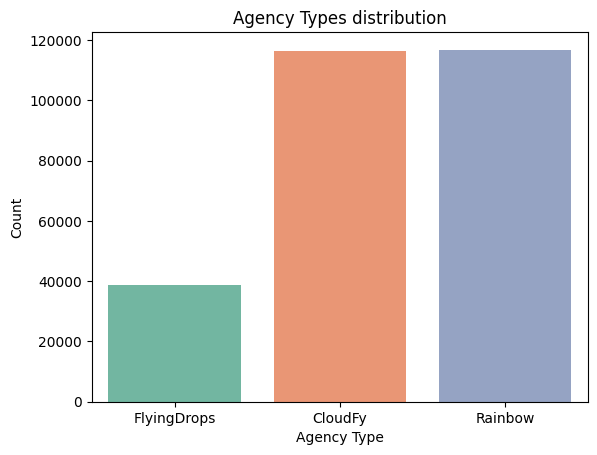

In [37]:
sns.countplot(x='agency',data=flight_filtered_df,palette = "Set2")
plt.title('Agency Types distribution')
plt.xlabel('Agency Type')
plt.ylabel('Count')
plt.show()

#### Flight bookings count per month

<Axes: xlabel='month', ylabel='count'>

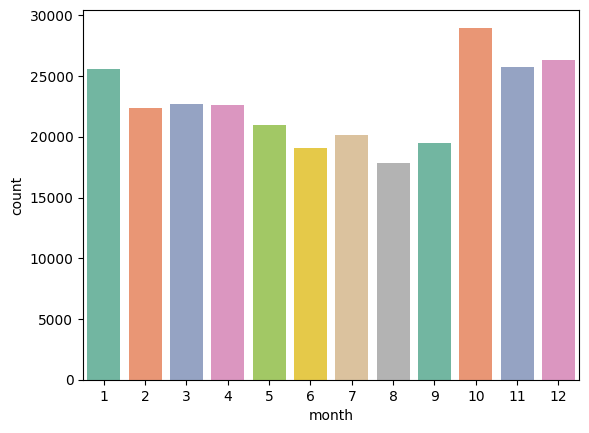

In [38]:
sns.countplot(x='month',data=flight_filtered_df,palette = "Set2")


### **Distribution of Categories in Categorical Coulmns using a pie-chart**

#### Distribution of Flight Types

flightType
firstClass    116418
premium        78004
economic       77466
Name: count, dtype: int64


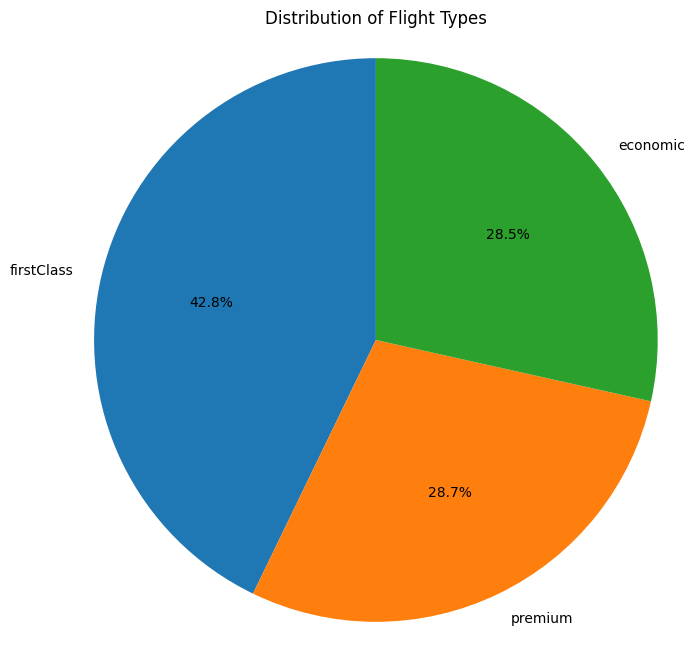

In [39]:
# Get the counts of each flight type
flight_type_counts = flight_filtered_df['flightType'].value_counts()

# Display the counts of each class in 'Flight Type'
print(flight_type_counts)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(flight_type_counts, labels=flight_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Flight Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### Distribution of Agency

In [40]:
# Get the counts of each agency
agency_type_counts = flight_filtered_df['agency'].value_counts()

# Display the counts of each class in 'Agency Type'
print(agency_type_counts)


agency
Rainbow        116752
CloudFy        116378
FlyingDrops     38758
Name: count, dtype: int64


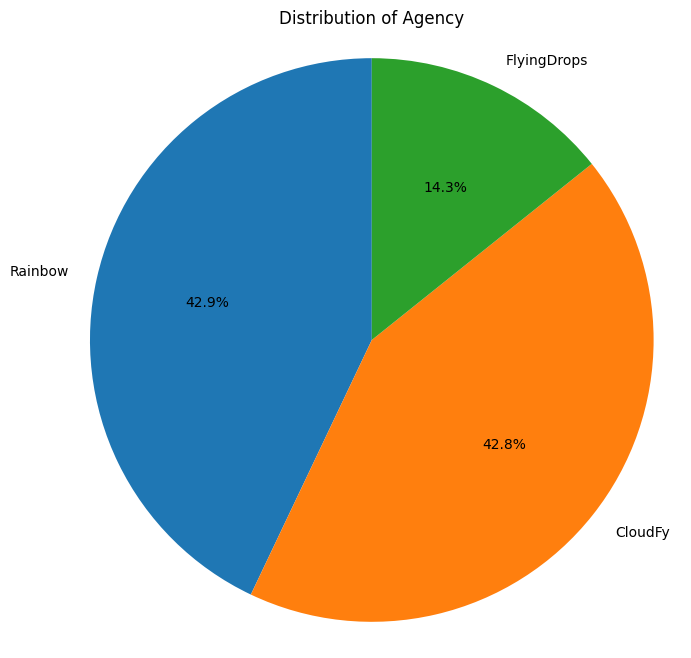

In [41]:
# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(agency_type_counts, labels=agency_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Agency')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### Distribtion of destination cities

In [42]:
# Get the counts of each destination_city_counts
destination_city_counts = flight_filtered_df['to'].value_counts()

# Display the counts of each class in 'Destination Cities'
print(destination_city_counts)


to
Florianopolis (SC)     57317
Aracaju (SE)           37224
Campo Grande (MS)      34748
Brasilia (DF)          30779
Recife (PE)            30480
Natal (RN)             23796
Sao Paulo (SP)         23625
Salvador (BH)          17104
Rio de Janeiro (RJ)    16815
Name: count, dtype: int64


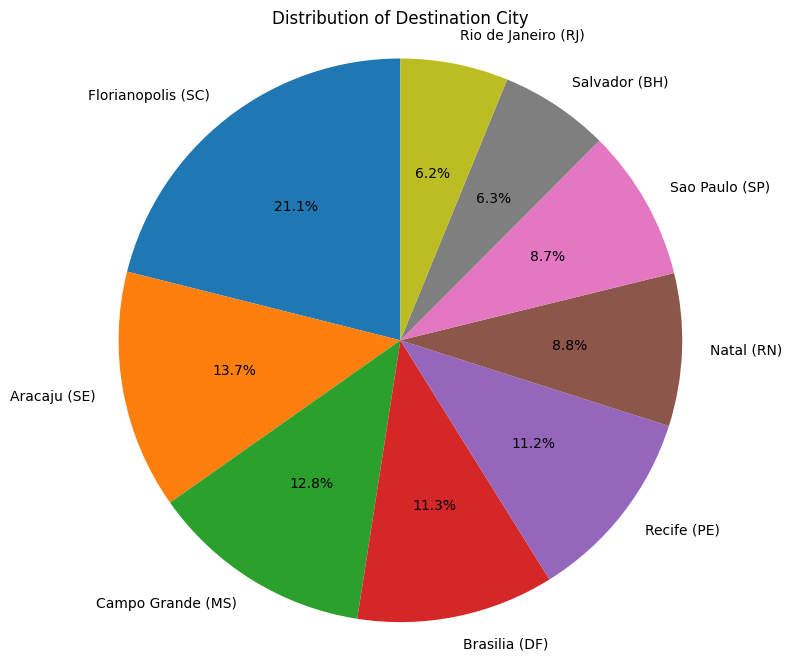

In [43]:
# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(destination_city_counts, labels=destination_city_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Destination City')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Distribution of Values in Numerical Coulmns using a pie-chart

In [44]:
# Get the counts of each flight type
week_day_type_counts = flight_filtered_df['week_day'].value_counts()

# Display the counts of each class in 'Week days'
print(week_day_type_counts)

week_day
3    135944
0     34108
6     34088
4     33880
5     33868
Name: count, dtype: int64


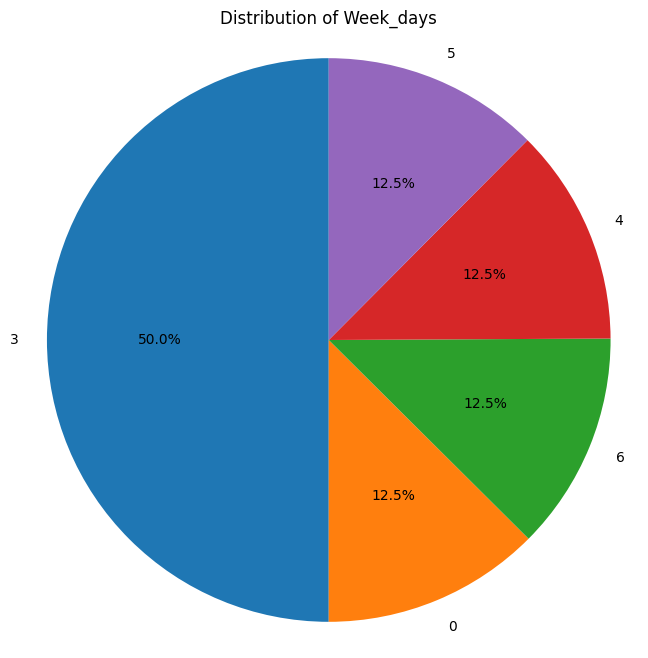

In [45]:
# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(week_day_type_counts, labels=week_day_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Week_days')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### Distribution of Year

year
2020    112571
2021     75363
2022     41761
2019     35826
2023      6367
Name: count, dtype: int64


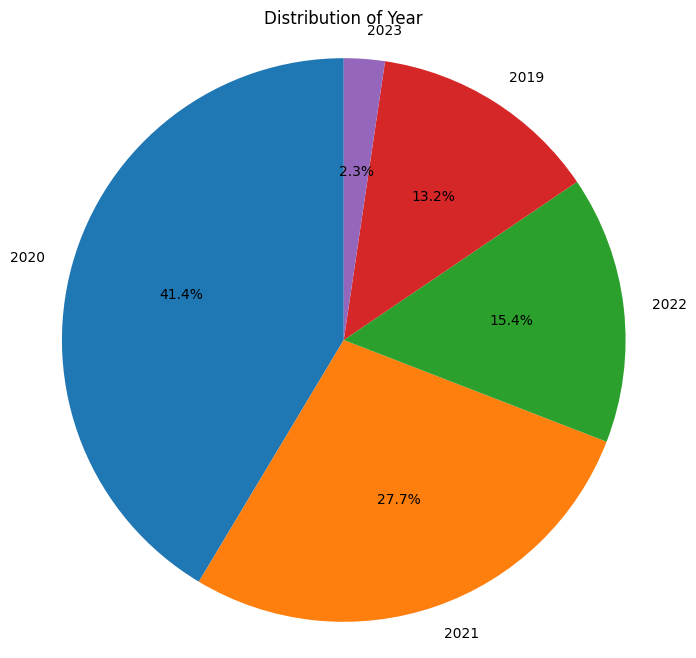

In [46]:
# Get the counts of each flight type
year_counts = flight_filtered_df['year'].value_counts()

# Display the counts of each class in 'Week days'
print(year_counts)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Year')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### **Bivariate Analysis**

#### Check for Linear relationship btwn Independent numerical Variable and Target variable

#### Price vs. Travel Time

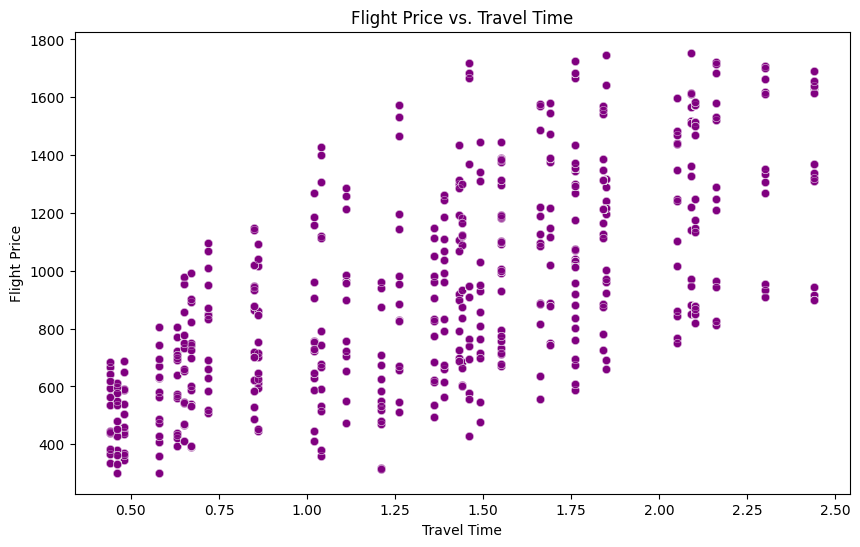

In [47]:
# Price vs. Travel Time

plt.figure(figsize=(10, 6))
sns.scatterplot(data=flight_filtered_df, x='time', y='price', color='purple', alpha=0.5)
plt.title('Flight Price vs. Travel Time')
plt.xlabel('Travel Time')
plt.ylabel('Flight Price')
plt.show()

#### Price vs. Travel Distance

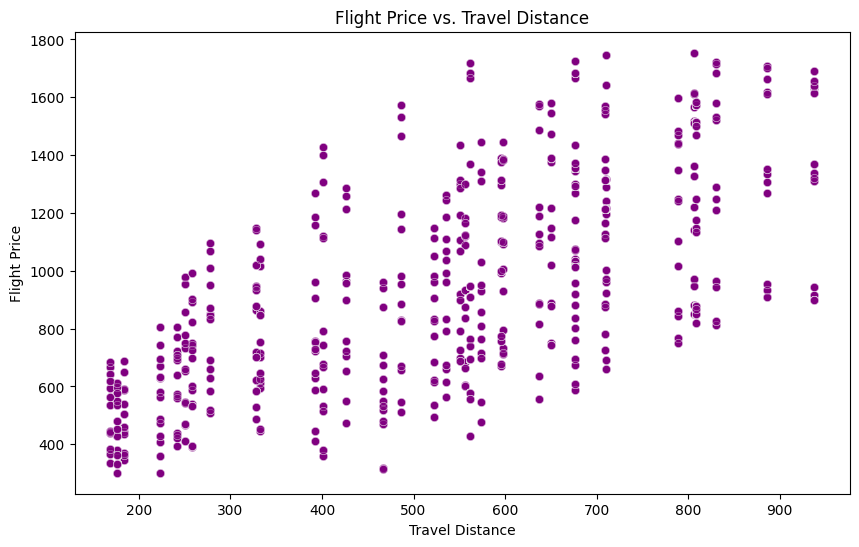

In [48]:
# Price vs. Travel Distance

plt.figure(figsize=(10, 6))
sns.scatterplot(data=flight_filtered_df, x='distance', y='price', color='purple', alpha=0.5)
plt.title('Flight Price vs. Travel Distance')
plt.xlabel('Travel Distance')
plt.ylabel('Flight Price')
plt.show()

1. Price vs. Hotel Ratings Plot:

* The plot examines the relationship between "flight price" and "travel distance" for travel packages.
* Each point represents a travel distance,  on the x-axis and flight price on the y-axis.

2. Inference:

* There doesn't seem to be a strong linear correlation between flight price and travel distance.
* Most data points are scattered across the plot, indicating that travel distance alone may not be a dominant factor in determining the price.
* However, there are some clusters of points, suggesting that specific rating ranges may have an impact on price within certain regions.

### Check for Outliers in Categorical Coulmns

#### Distribution of prices per agency type

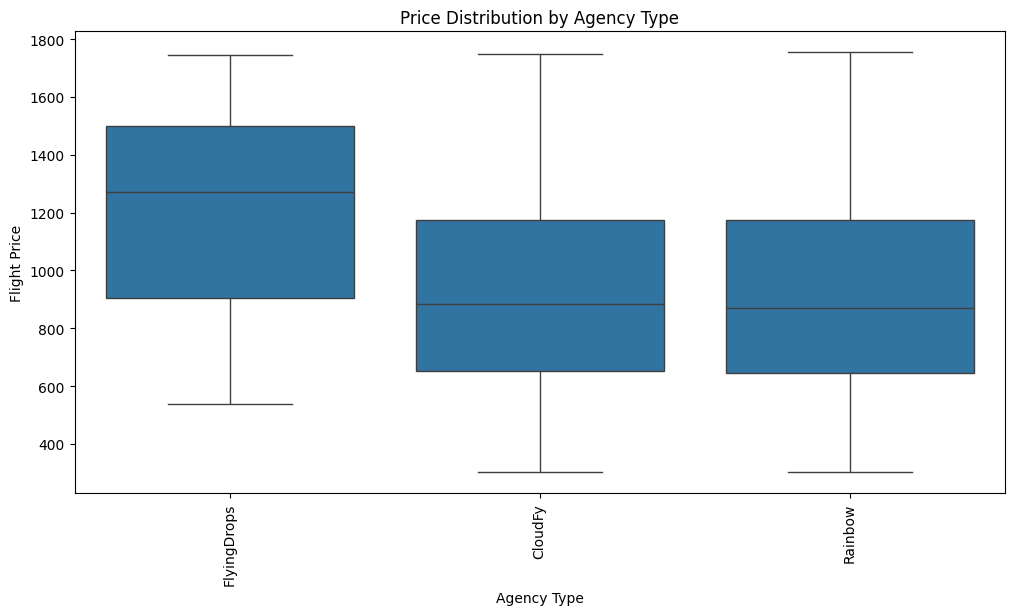

In [49]:
# Box Plots:
# Visualize the distribution of prices per agency type:

plt.figure(figsize=(12, 6))
sns.boxplot(data=flight_filtered_df, x='agency', y='price')
plt.xticks(rotation=90)
plt.xlabel('Agency Type')
plt.ylabel('Flight Price')
plt.title('Price Distribution by Agency Type')
plt.show()

#### Distribution of prices per Flight type

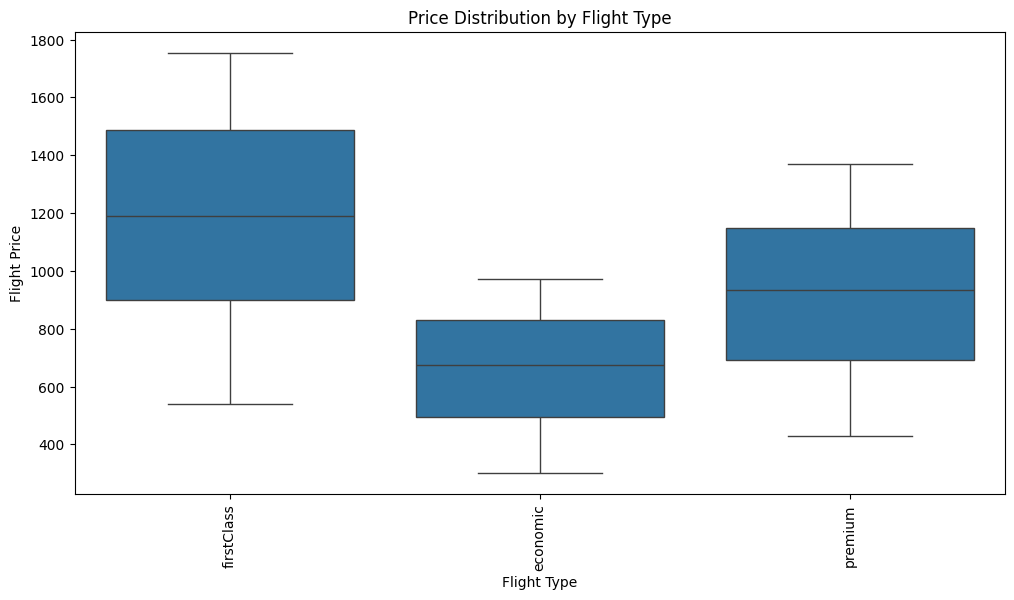

In [50]:
# Box Plots:
# Visualize the distribution of prices per Flight type:

plt.figure(figsize=(12, 6))
sns.boxplot(data=flight_filtered_df, x='flightType', y='price')
plt.xticks(rotation=90)
plt.xlabel('Flight Type')
plt.ylabel('Flight Price')
plt.title('Price Distribution by Flight Type')
plt.show()

#### Distribution of prices per Destination Cities

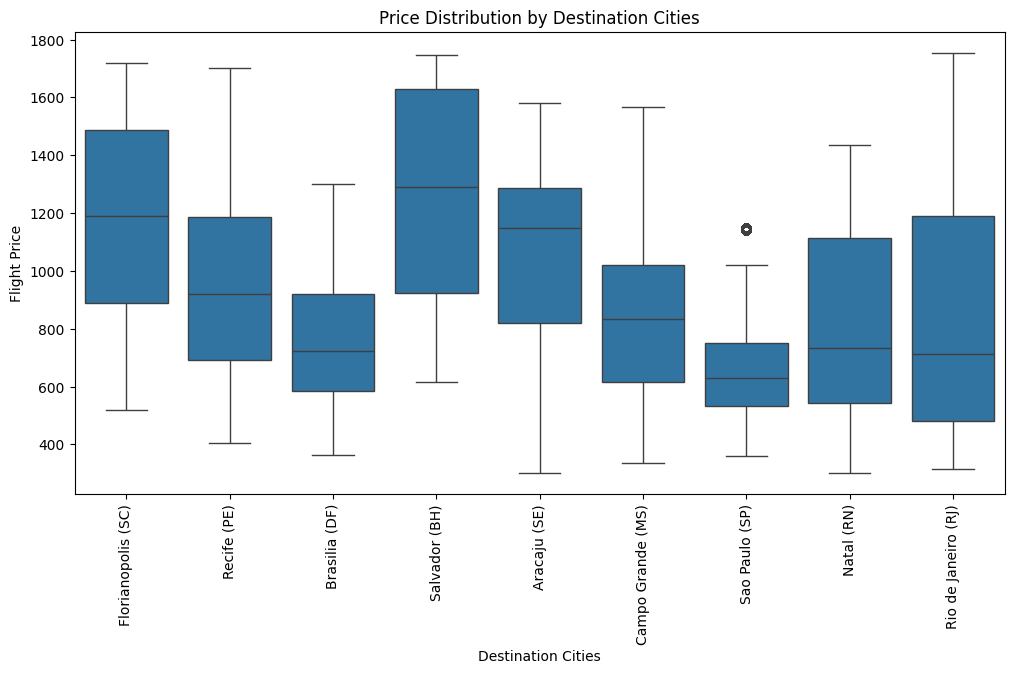

In [51]:
# Box Plots:
# Visualize the distribution of prices per Destination Cities:

plt.figure(figsize=(12, 6))
sns.boxplot(data=flight_filtered_df, x='to', y='price')
plt.xticks(rotation=90)
plt.xlabel('Destination Cities')
plt.ylabel('Flight Price')
plt.title('Price Distribution by Destination Cities')
plt.show()

**Inference of the plot:**

* Variability: The box plots reveal varying levels of price variability within different package types. Some package types have a wider range of prices (larger boxes), while others have narrower ranges (smaller boxes).

* Outliers: Outliers, represented as individual points beyond the "whiskers" of the boxes, can be seen in several package types. These outliers indicate some extreme price values within those categories.

* Median Prices: The horizontal line inside each box represents the median price for each package type. It's a quick way to compare the typical prices across different categories.

* Package Type Impact: The plot provides a visual sense of how package type influences price distribution. Some package types consistently have higher or lower prices than others.

### **Multi-Variate Analysis**

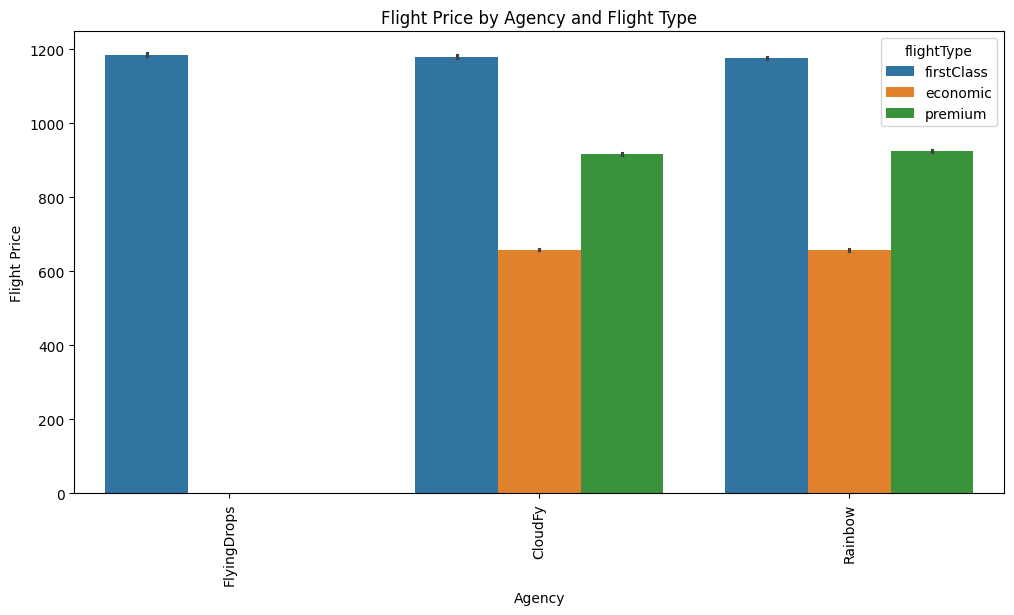

In [52]:
# Bar Plots:
# Explore the relationship between the agency and flight types:

plt.figure(figsize=(12, 6))
sns.barplot(data=flight_filtered_df, x='agency', y='price', hue='flightType')
plt.xticks(rotation=90)
plt.xlabel('Agency')
plt.ylabel('Flight Price')
plt.title('Flight Price by Agency and Flight Type')
plt.show()

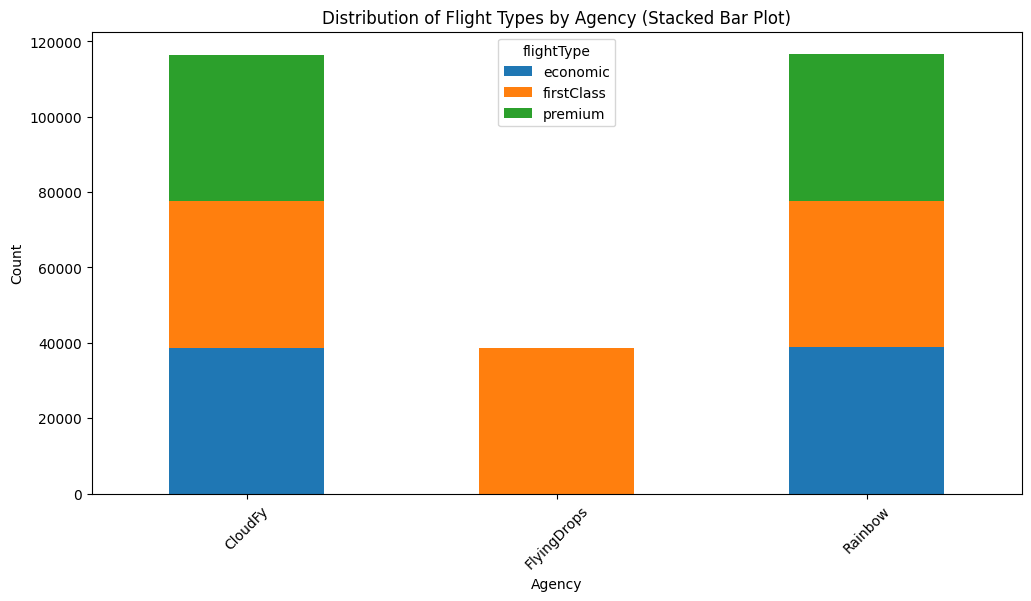

In [53]:
# Stacked Bar Plot:
# Show the distribution of flight types by agency using a stacked bar plot:

flight_package_counts = flight_filtered_df.groupby(['agency', 'flightType']).size().unstack(fill_value=0)
flight_package_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Agency')
plt.ylabel('Count')
plt.title('Distribution of Flight Types by Agency (Stacked Bar Plot)')
plt.xticks(rotation=45)
plt.show()

**Inference of the plot:**

* The plot shows that the agency Flyingdrops is quite popular in booking only first class tickets to its customers and no bookings in any other flight type"

* On the contrary, rest two agencies are helping their customers to book their tickets in various flight Class apart from First Class. Both these agencies work in pretty much similar price ranges.

* This information suggests that Flyingdrops only deals with HNI or Premium Customers and there is no diverse option apart from FirstClass Type for the customers.

* Inference from the plot:

* The stacked bar plot visualizes the distribution of package types by start city in the dataset.

### **Word Clouds**

#### Common words in Boarding City

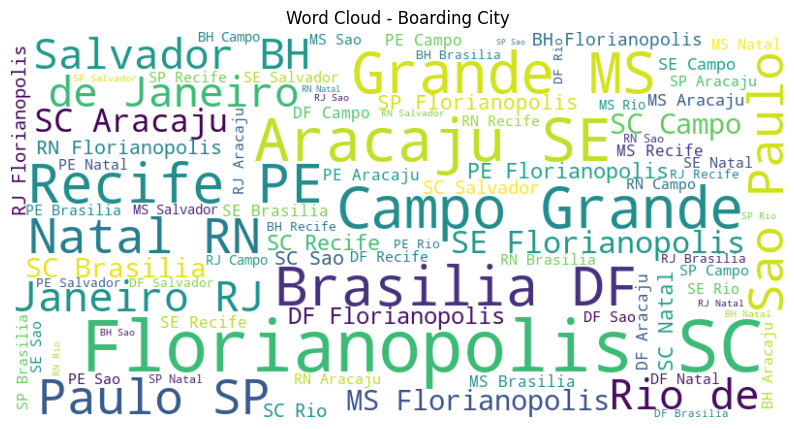

In [54]:
# If you want to visualize common words in text columns like "Boarding City," you can create a word cloud:

from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(flight_df['from']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Boarding City')
plt.show()

#### Common words in Destination

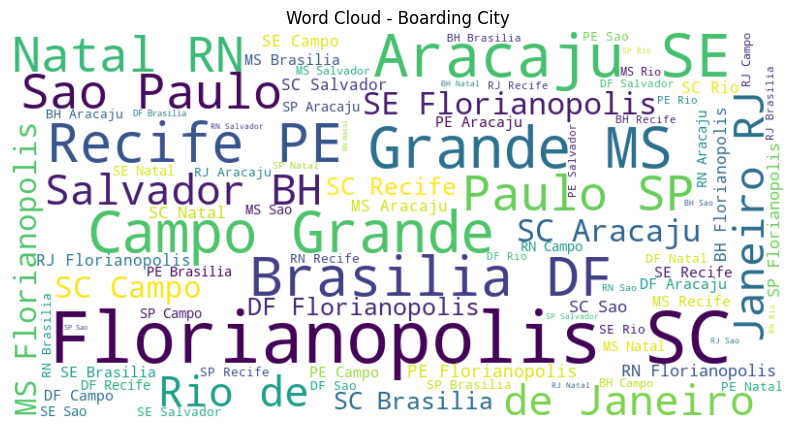

In [55]:
# If you want to visualize common words in text columns like "Boarding City," you can create a word cloud:

from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(flight_df['to']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Boarding City')
plt.show()

## Feature Engineering


In [56]:
# renaming the Column name
flight_filtered_df.rename(columns={"to":"destination"},inplace=True)


In [57]:
# Creating a new feature using distance and time columns
flight_filtered_df['flight_speed']=round(flight_filtered_df['distance']/flight_filtered_df['time'],2)


In [58]:
flight_filtered_df.head()

,from,destination,flightType,agency,time,distance,day,month,year,week_day,week_no,price,flight_speed
0,Recife (PE),Florianopolis (SC),firstClass,FlyingDrops,1.76,676.53,26,9,2019,3,39,1434.38,384.39
1,Florianopolis (SC),Recife (PE),firstClass,FlyingDrops,1.76,676.53,30,9,2019,0,40,1292.29,384.39
2,Brasilia (DF),Florianopolis (SC),firstClass,CloudFy,1.66,637.56,3,10,2019,3,40,1487.52,384.07
3,Florianopolis (SC),Brasilia (DF),firstClass,CloudFy,1.66,637.56,4,10,2019,4,40,1127.36,384.07
4,Aracaju (SE),Salvador (BH),firstClass,CloudFy,2.16,830.86,10,10,2019,3,41,1684.05,384.66


In [123]:
flight_filtered_df['year'].unique()

array([2019, 2020, 2021, 2022, 2023], dtype=int32)

In [60]:
flight_filtered_df.columns

Index(['from', 'destination', 'flightType', 'agency', 'time', 'distance',
       'day', 'month', 'year', 'week_day', 'week_no', 'price', 'flight_speed'],
      dtype='object')

<Axes: xlabel='flight_speed'>

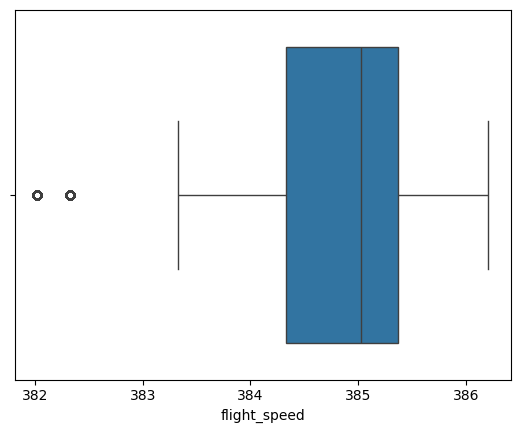

In [61]:
sns.boxplot(x=flight_filtered_df['flight_speed'])


In [62]:
Q1= np.percentile(flight_filtered_df['flight_speed'],25)
Q3= np.percentile(flight_filtered_df['flight_speed'],75)
IQR= Q3-Q1

In [63]:
lower_bound= Q1- IQR*1.5
upper_bound= Q3+IQR*1.5

The distribution of flight speed coulmn in the above graph is indicating a left skew due to outliers ,these outliers we can see in box plot occuring below the flight speed of 383km/hr. It may be not considered as outlier in this case,because these are valid data poits and these speed occured due to bad weather condition most probably.

In [64]:
# Select only the numerical columns
numerical_columns = flight_filtered_df.select_dtypes(include=['number'])


In [65]:
# Calculate the skewness for the numerical columns
skewness = numerical_columns.skew()
print(skewness)

time           -0.179825
distance       -0.183944
day             0.006463
month          -0.039119
year            0.378661
week_day       -0.441701
week_no        -0.030191
price           0.313578
flight_speed   -1.037095
dtype: Float64


In [66]:
df=flight_filtered_df.copy()
df.describe()

,time,distance,day,month,year,week_day,week_no,price,flight_speed
count,271888.000000,271888.000000,271888.000000,271888.000000,271888.000000,271888.000000,271888.0,271888.00000,271888.000000
mean,1.421147,546.955535,15.790458,6.607519,2020.522862,3.373521,27.04532,957.37503,384.785156
std,0.542541,208.851288,8.826961,3.606611,0.980161,1.655530,15.793449,362.31189,0.850795
min,0.440000,168.220000,1.000000,1.000000,2019.000000,0.000000,1.0,301.51000,382.020000
25%,1.040000,401.660000,8.000000,3.000000,2020.000000,3.000000,13.0,672.66000,384.330000
50%,1.460000,562.140000,16.000000,7.000000,2020.000000,3.000000,27.0,904.00000,385.030000
75%,1.760000,676.530000,24.000000,10.000000,2021.000000,4.000000,42.0,1222.24000,385.370000
max,2.440000,937.770000,31.000000,12.000000,2023.000000,6.000000,53.0,1754.17000,386.210000


In [68]:
flight_filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271888 entries, 0 to 271887
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   from          271888 non-null  object 
 1   destination   271888 non-null  object 
 2   flightType    271888 non-null  object 
 3   agency        271888 non-null  object 
 4   time          271888 non-null  float64
 5   distance      271888 non-null  float64
 6   day           271888 non-null  int32  
 7   month         271888 non-null  int32  
 8   year          271888 non-null  int32  
 9   week_day      271888 non-null  int32  
 10  week_no       271888 non-null  UInt32 
 11  price         271888 non-null  float64
 12  flight_speed  271888 non-null  float64
dtypes: UInt32(1), float64(4), int32(4), object(4)
memory usage: 22.0+ MB


### One-hot encoding

In [69]:
# Example of one-hot encoding
# drop_first=True prevents multicollinearity by removing one category from each.

flight_filtered_df = pd.get_dummies(flight_filtered_df, columns=['from','destination','flightType','agency'], drop_first= False)


In [70]:
flight_filtered_df.shape


(271888, 33)

## Feature Selection

#### Feature Selection Using Statistical Test ANNOVA F-Test

In [71]:
final_df1= flight_filtered_df.drop(columns=['time','flight_speed','month','year','distance'],axis=1)


In [72]:
print(final_df1.shape)

(271888, 28)


In [73]:
print(final_df1['price'].describe())  # Ensure no missing or zero values


count    271888.00000
mean        957.37503
std         362.31189
min         301.51000
25%         672.66000
50%         904.00000
75%        1222.24000
max        1754.17000
Name: price, dtype: float64


In [74]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

# Separate features (X) and target variable (y)
X = final_df1.drop('price', axis=1)  # Features
y = final_df1['price']                # Target variable


In [75]:
X.rename(columns={'from_Sao Paulo (SP)':'from_Sao_Paulo (SP)','from_Rio de Janeiro (RJ)':'from_Rio_de_Janeiro (RJ)','from_Campo Grande (MS)':'from_Campo_Grande (MS)',
                                  'destination_Sao Paulo (SP)':'destination_Sao_Paulo (SP)','destination_Rio de Janeiro (RJ)':'destination_Rio_de_Janeiro (RJ)','destination_Campo Grande (MS)':'destination_Campo_Grande (MS)'},inplace=True)


In [76]:
features_ordering=['from_Florianopolis (SC)',
 'from_Sao_Paulo (SP)',
 'from_Salvador (BH)',
 'from_Brasilia (DF)',
 'from_Rio_de_Janeiro (RJ)',
 'from_Campo_Grande (MS)',
 'from_Aracaju (SE)',
 'from_Natal (RN)',
 'from_Recife (PE)',
 'destination_Florianopolis (SC)',
 'destination_Sao_Paulo (SP)',
 'destination_Salvador (BH)',
 'destination_Brasilia (DF)',
 'destination_Rio_de_Janeiro (RJ)',
 'destination_Campo_Grande (MS)',
 'destination_Aracaju (SE)',
 'destination_Natal (RN)',
 'destination_Recife (PE)',
 'flightType_economic',
 'flightType_firstClass',
 'flightType_premium',
 'agency_Rainbow',
 'agency_CloudFy',
 'agency_FlyingDrops',
 'week_no',
 'week_day',
 'day']

#### Feature Ordering Check
To confirm that your feature order is correct, run:

In [78]:
print(set(features_ordering) - set(X.columns))  # Columns in list but missing in DataFrame
print(set(X.columns) - set(features_ordering))  # Columns in DataFrame but missing in list


set()
set()


In [79]:
#Ordering features based on flask output
final_features_1= X[features_ordering]


In [80]:
X1= final_features_1

# Target variable
y1 = y

# Split the data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

scaler_new = StandardScaler()

X_train1 = scaler_new.fit_transform(X_train1)
X_test1 = scaler_new.transform(X_test1)

#### Verify StandardScaler Output

In [81]:
print(X_train1.shape, X_test1.shape)  # Should be (217510, 27) and (54378, 27)
print(type(X_train1))  # Should be <class 'numpy.ndarray'>


(217510, 27) (54378, 27)
<class 'numpy.ndarray'>


In [ ]:
final_features_1.columns


Index(['from_Florianopolis (SC)', 'from_Sao_Paulo (SP)', 'from_Salvador (BH)',
       'from_Brasilia (DF)', 'from_Rio_de_Janeiro (RJ)',
       'from_Campo_Grande (MS)', 'from_Aracaju (SE)', 'from_Natal (RN)',
       'from_Recife (PE)', 'destination_Florianopolis (SC)',
       'destination_Sao_Paulo (SP)', 'destination_Salvador (BH)',
       'destination_Brasilia (DF)', 'destination_Rio_de_Janeiro (RJ)',
       'destination_Campo_Grande (MS)', 'destination_Aracaju (SE)',
       'destination_Natal (RN)', 'destination_Recife (PE)',
       'flightType_economic', 'flightType_firstClass', 'flightType_premium',
       'agency_Rainbow', 'agency_CloudFy', 'agency_FlyingDrops', 'week_no',
       'week_day', 'day'],
      dtype='object')

## Model building

### Model 1

In [82]:
# Create and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train1, y_train1)

# Make predictions on the test set
y_pred1 = linear_model.predict(X_test1)

In [83]:
# Evaluate the model
mae_lr = mean_absolute_error(y_test1, y_pred1)
mse_lr = mean_squared_error(y_test1, y_pred1)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test1, y_pred1)

# Calculate adjusted R-squared for linear regression
n = X_test1.shape[0]
p = X_test1.shape[1]


# Calculate adjusted R-squared
adj_r2_lr = 1 - ((1 - r2_lr) * (n - 1) / (n - p - 1))

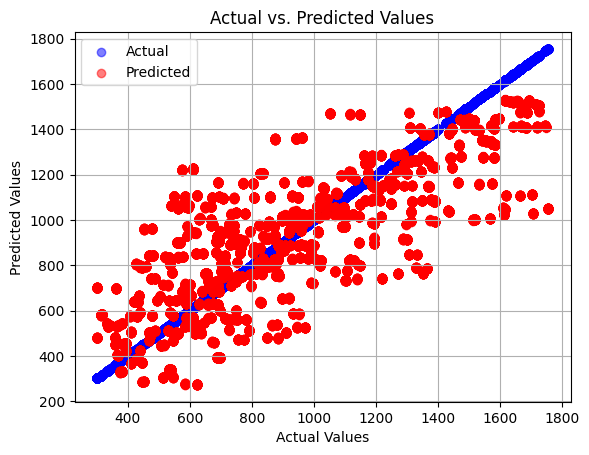

In [84]:
plt.scatter(y_test1, y_test1, c='b', label='Actual', alpha=0.5)  # Blue for actual
plt.scatter(y_test1, y_pred1, c='r', label='Predicted', alpha=0.5)  # Red for predicted
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

### Model Evaluation

In [85]:
model_result = pd.DataFrame([['Linear Regression Baseline', mse_lr,rmse_lr,mae_lr, r2_lr,adj_r2_lr]],
               columns = ['Model', 'MSE', 'RMSE', 'MAE', 'R2','adj_r2'])

model_result

,Model,MSE,RMSE,MAE,R2,adj_r2
0,Linear Regression Baseline,47023.0807,216.848059,165.358445,0.643141,0.642963


### Hyperparameter Tuning Linear

In [86]:
# Define hyperparameters and their potential values
param_grid_linear = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

# Create a GridSearchCV object for Linear Regression
grid_lr = GridSearchCV(linear_model, param_grid_linear, cv=3, scoring='neg_mean_squared_error')
grid_lr.fit(X_train1, y_train1)

# Get the best hyperparameters for Linear Regression
best_linear_reg = grid_lr.best_estimator_

# Perform grid search
best_linear_reg.fit(X_train1, y_train1)

LinearRegression()

In [87]:
# Print the best hyperparameters
print("Best Hyperparameters for Linear Regression:", grid_lr.best_estimator_)


Best Hyperparameters for Linear Regression: LinearRegression()


#### Model Evaluation

In [88]:
# Evaluate the model
y_pred_linear_tuned = best_linear_reg.predict(X_test1)

mae_linear_tuned = mean_absolute_error(y_test1, y_pred_linear_tuned )
mse_linear_tuned = mean_squared_error(y_test1, y_pred_linear_tuned )
rmse_linear_tuned = np.sqrt(mse_linear_tuned)
r2_linear_tuned = r2_score(y_test1, y_pred_linear_tuned )
adj_r2_linear_tuned = 1 - ((1 - r2_linear_tuned) * (n - 1) / (n - p - 1))

model = pd.DataFrame([['Linear Regression Tuned',  mse_linear_tuned,rmse_linear_tuned,mae_linear_tuned, r2_linear_tuned,adj_r2_linear_tuned]],
               columns = ['Model', 'MSE', 'RMSE', 'MAE', 'R2','adj_r2'])

model_result = pd.concat([model_result,model],axis=0,ignore_index = True)
model_result

,Model,MSE,RMSE,MAE,R2,adj_r2
0,Linear Regression Baseline,47023.0807,216.848059,165.358445,0.643141,0.642963
1,Linear Regression Tuned,47023.0807,216.848059,165.358445,0.643141,0.642963


### Model 2

In [89]:
# Initialize the Decision Tree Regressor model
decision_tree_reg = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
decision_tree_reg.fit(X_train1, y_train1)

# Make predictions on the test data
y_pred_decision = decision_tree_reg.predict(X_test1)


In [90]:
# Evaluate the model
mse_dt = mean_squared_error(y_test1, y_pred_decision)
rmse_dt = mse_dt**0.5
mae_dt = mean_absolute_error(y_test1, y_pred_decision)
r2_dt = r2_score(y_test1, y_pred_decision)
adj_r2_dt = 1 - ((1 - r2_dt) * (n - 1) / (n - p - 1))


In [91]:
print("Mean Squared Error (MSE):", round(mse_dt,4))
print("Root Mean Squared Error (RMSE):", round(rmse_dt,4))
print("Mean Absolute Error (MAE):", round(mae_dt,4))
print("R-squared (R2):", round(r2_dt,4))
print("Adjusted r2-score:", round(adj_r2_dt,4))

Mean Squared Error (MSE): 1.4628
Root Mean Squared Error (RMSE): 1.2095
Mean Absolute Error (MAE): 0.0202
R-squared (R2): 1.0
Adjusted r2-score: 1.0


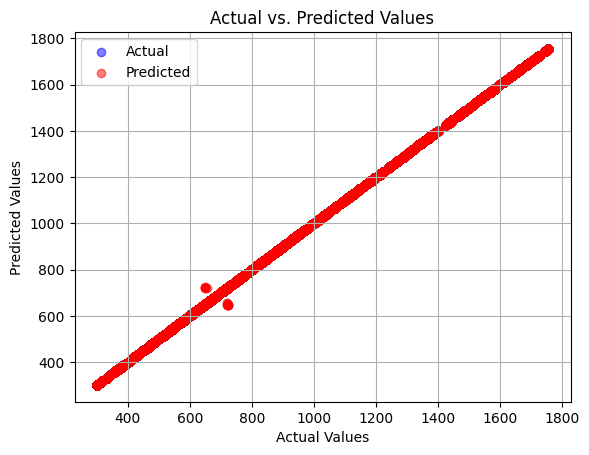

In [92]:
plt.scatter(y_test1, y_test1, c='b', label='Actual', alpha=0.5)  # Blue for actual
plt.scatter(y_test1, y_pred_decision, c='r', label='Predicted', alpha=0.5)  # Red for predicted
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

#### Model Evaluation

In [93]:
model = pd.DataFrame([['Decision Tree Baseline',  mse_dt,rmse_dt,mae_dt, r2_dt,adj_r2_dt]],
               columns = ['Model', 'MSE', 'RMSE', 'MAE', 'R2','adj_r2'])

model_result = pd.concat([model_result,model],axis=0,ignore_index = True)
model_result

,Model,MSE,RMSE,MAE,R2,adj_r2
0,Linear Regression Baseline,47023.080700,216.848059,165.358445,0.643141,0.642963
1,Linear Regression Tuned,47023.080700,216.848059,165.358445,0.643141,0.642963
2,Decision Tree Baseline,1.462788,1.209458,0.020189,0.999989,0.999989


### Hyperparameter tunning

In [94]:
# Define hyperparameters and their potential values
param_grid_dt = {
    'criterion': ['friedman_mse', 'squared_error'],
    'max_depth': [15,30,45],
    'min_samples_split': [2,3,5],
    'max_features': [15,27,'sqrt'],
    'ccp_alpha' :[1,2]
}


# Create a GridSearchCV object for Decision Tree Regressor
grid_search_dt = GridSearchCV(decision_tree_reg, param_grid_dt, cv=3, scoring='neg_mean_squared_error')
grid_search_dt.fit(X_train1, y_train1)

# Get the best hyperparameters for Decision Tree Regressor
best_decision_tree_model = grid_search_dt.best_estimator_


In [95]:
grid_search_dt.best_estimator_

DecisionTreeRegressor(ccp_alpha=1, max_depth=45, max_features=27,
                      min_samples_split=5, random_state=42)

In [96]:
# Print the best hyperparameters
print("Best Hyperparameters for Decision Tree:", grid_search_dt.best_estimator_)


Best Hyperparameters for Decision Tree: DecisionTreeRegressor(ccp_alpha=1, max_depth=45, max_features=27,
                      min_samples_split=5, random_state=42)


#### Model Evaluation

In [97]:
# Evaluate the best model
y_pred_dt_tuned = best_decision_tree_model.predict(X_test1)

mae_dt_tuned = mean_absolute_error(y_test1, y_pred_dt_tuned)
mse_dt_tuned = mean_squared_error(y_test1, y_pred_dt_tuned)
rmse_dt_tuned = np.sqrt(mse_dt_tuned)
r2_dt_tuned = r2_score(y_test1, y_pred_dt_tuned)
adj_r2_dt_tuned = 1 - ((1 - r2_dt_tuned) * (n - 1) / (n - p - 1))

model = pd.DataFrame([['Decision Tree Tuned',  mse_dt_tuned,rmse_dt_tuned,mae_dt_tuned, r2_dt_tuned,adj_r2_dt_tuned]],
               columns = ['Model', 'MSE', 'RMSE', 'MAE', 'R2','adj_r2'])

model_result = pd.concat([model_result,model],axis=0,ignore_index = True)
model_result


,Model,MSE,RMSE,MAE,R2,adj_r2
0,Linear Regression Baseline,47023.080700,216.848059,165.358445,0.643141,0.642963
1,Linear Regression Tuned,47023.080700,216.848059,165.358445,0.643141,0.642963
2,Decision Tree Baseline,1.462788,1.209458,0.020189,0.999989,0.999989
3,Decision Tree Tuned,44.428859,6.665498,4.023163,0.999663,0.999663


### Model 3

In [98]:
# Create and train the Linear Regression model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train1, y_train1)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test1)

In [99]:
# Evaluate the model
mae_rf = mean_absolute_error(y_test1,y_pred_rf)
mse_rf = mean_squared_error(y_test1, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test1, y_pred_rf)
adj_r2_rf = 1 - ((1 - r2_rf) * (n - 1) / (n - p - 1))


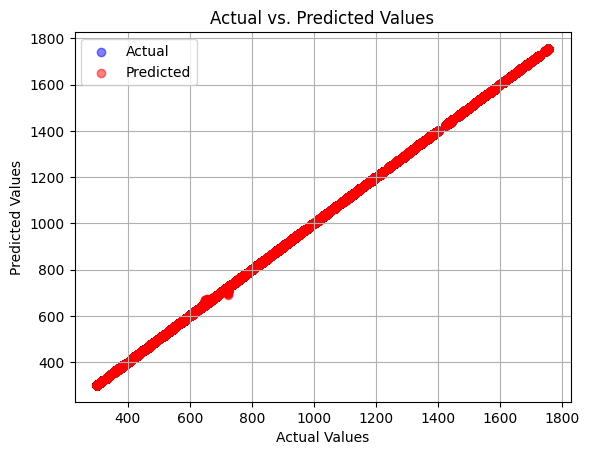

In [100]:
plt.scatter(y_test1, y_test1, c='b', label='Actual', alpha=0.5)  # Blue for actual
plt.scatter(y_test1, y_pred_rf, c='r', label='Predicted', alpha=0.5)  # Red for predicted
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

#### Model Evaluation

In [101]:
model = pd.DataFrame([['Random Forest Baseline',  mse_rf,rmse_rf,mae_rf, r2_rf,adj_r2_rf]],
               columns = ['Model', 'MSE', 'RMSE', 'MAE', 'R2','adj_r2'])

model_result = pd.concat([model_result,model],axis=0,ignore_index = True)
model_result

,Model,MSE,RMSE,MAE,R2,adj_r2
0,Linear Regression Baseline,47023.080700,216.848059,165.358445,0.643141,0.642963
1,Linear Regression Tuned,47023.080700,216.848059,165.358445,0.643141,0.642963
2,Decision Tree Baseline,1.462788,1.209458,0.020189,0.999989,0.999989
3,Decision Tree Tuned,44.428859,6.665498,4.023163,0.999663,0.999663
4,Random Forest Baseline,0.434912,0.659479,0.044348,0.999997,0.999997


### Hyperparameter tunning

In [107]:
# Define hyperparameters and their potential values
param_grid_rf = {
    'n_estimators': [50,100],
    'max_depth': [10,20],
    'min_samples_split': [2, 5,10],
    'max_features': ['sqrt',27],
    'n_jobs': [2]


}

# Create a GridSearchCV object for Random Forest Regression
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=3, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train1, y_train1)

# Get the best hyperparameters for Random Forest Regression
best_rf_model = grid_search_rf.best_estimator_

#### Model Evaluation

In [109]:
# Evaluate the best model
y_pred_rf_tuned = best_rf_model.predict(X_test1)

mae_rf_tuned = mean_absolute_error(y_test1, y_pred_rf_tuned)
mse_rf_tuned = mean_squared_error(y_test1, y_pred_rf_tuned)
rmse_rf_tuned = np.sqrt(mse_rf_tuned)
r2_rf_tuned = r2_score(y_test1, y_pred_rf_tuned)
adj_r2_rf_tuned = 1 - ((1 - r2_rf_tuned) * (n - 1) / (n - p - 1))

model = pd.DataFrame([['Random Forest Tuned',  mse_rf_tuned,rmse_rf_tuned,mae_rf_tuned, r2_rf_tuned,adj_r2_rf_tuned]],
               columns = ['Model', 'MSE', 'RMSE', 'MAE', 'R2','adj_r2'])

model_result = pd.concat([model_result,model],axis=0,ignore_index = True)
model_result

,Model,MSE,RMSE,MAE,R2,adj_r2
0,Linear Regression Baseline,47023.080700,216.848059,165.358445,0.643141,0.642963
1,Linear Regression Tuned,47023.080700,216.848059,165.358445,0.643141,0.642963
2,Decision Tree Baseline,1.462788,1.209458,0.020189,0.999989,0.999989
3,Decision Tree Tuned,44.428859,6.665498,4.023163,0.999663,0.999663
4,Random Forest Baseline,0.434912,0.659479,0.044348,0.999997,0.999997
5,Random Forest Tuned,18908.330120,137.507564,71.146583,0.856504,0.856433
6,Random Forest Tuned,1.274948,1.129136,0.100531,0.999990,0.999990
7,Random Forest Tuned,1.274948,1.129136,0.100531,0.999990,0.999990


### Visualizing tuned models

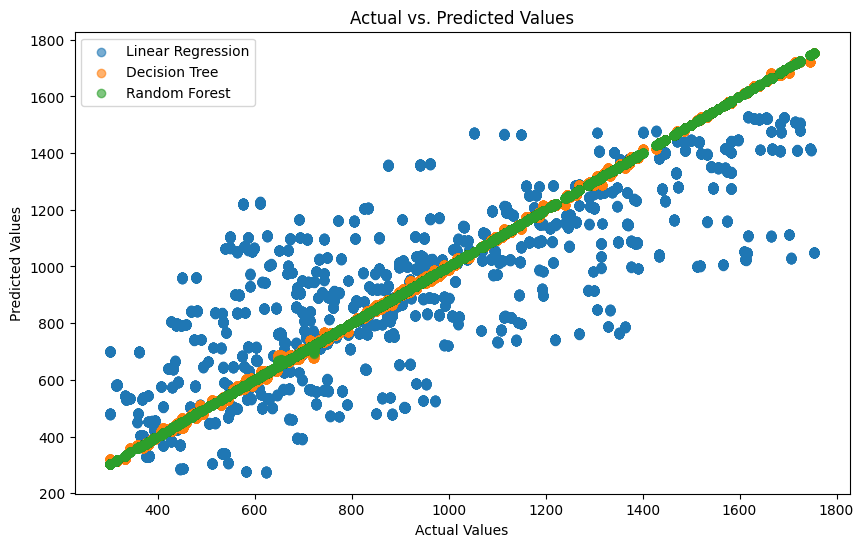

In [110]:
plt.figure(figsize=(10, 6))

# Linear Regression
plt.scatter(y_test1, y_pred_linear_tuned, label='Linear Regression', alpha=0.6)

# Decision Tree Regressor
plt.scatter(y_test1, y_pred_dt_tuned, label='Decision Tree', alpha=0.6)

# Random Forest Regressor
plt.scatter(y_test1, y_pred_rf_tuned, label='Random Forest', alpha=0.6)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()

From the above model evaluation we can say that decision tree model is performs best. For Linear regression and random forest we see that there is a lot of scattering of data.

### Visualization of residuals

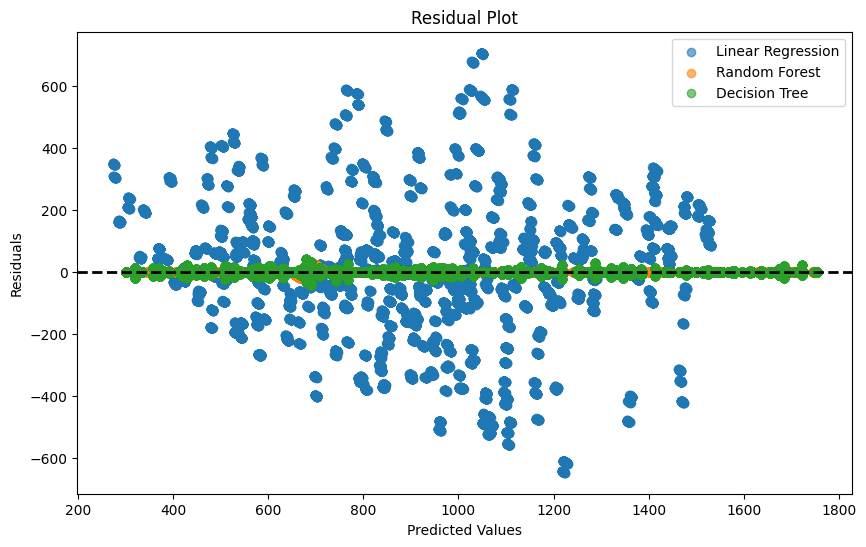

In [111]:
plt.figure(figsize=(10, 6))

# Linear Regression Residuals
residuals_lr = y_test1 - y_pred_linear_tuned
plt.scatter(y_pred_linear_tuned, residuals_lr, label='Linear Regression', alpha=0.6)

# Random Forest Regressor Residuals
residuals_rf = y_test1 - y_pred_rf_tuned
plt.scatter(y_pred_rf_tuned, residuals_rf, label='Random Forest', alpha=0.6)

# Decision Tree Regressor Residuals
residuals_dt = y_test1 -y_pred_dt_tuned
plt.scatter(y_pred_dt_tuned, residuals_dt, label='Decision Tree', alpha=0.6)

plt.axhline(0, color='black', linestyle='--', lw=2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.legend()
plt.show()

The best-performing model is the Random Forest Baseline model, as it has the lowest MSE, RMSE, and MAE while maintaining a very high R² score.

### Save the model

In [120]:
import pickle

# Save the trained RandomForestRegressor model
with open("rf_model.pkl", "wb") as model_file:
    pickle.dump(rf_model, model_file)

print(" Model saved successfully!")

 Model saved successfully!


In [121]:
# Save the trained StandardScaler
with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler_new, scaler_file)

print(" Scaler model saved successfully!")

 Scaler model saved successfully!


In [122]:
import pickle
import numpy as np

# Load the correctly saved scaler
with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

# Ensure it's the correct type
print(type(scaler))  # Should be <class 'sklearn.preprocessing._data.StandardScaler'>



<class 'sklearn.preprocessing._data.StandardScaler'>
